# Deep Learning - Scratch Pad

This is a space for scratch work for the deep learning nano degree in udacity.

First, import some shared libraries that are helpful...

In [7]:
import pandas as pd
import numpy as np

## Sigmoid Function

Moving from discrete to continous functions as the activation function. Instead of a step function, you can use a sigmoid function to get a "probability". For large positive values, it brings you close to 1. For large negative values, it brings you closer to 0. And for values close to 0, it brings you close to .5. Check it:

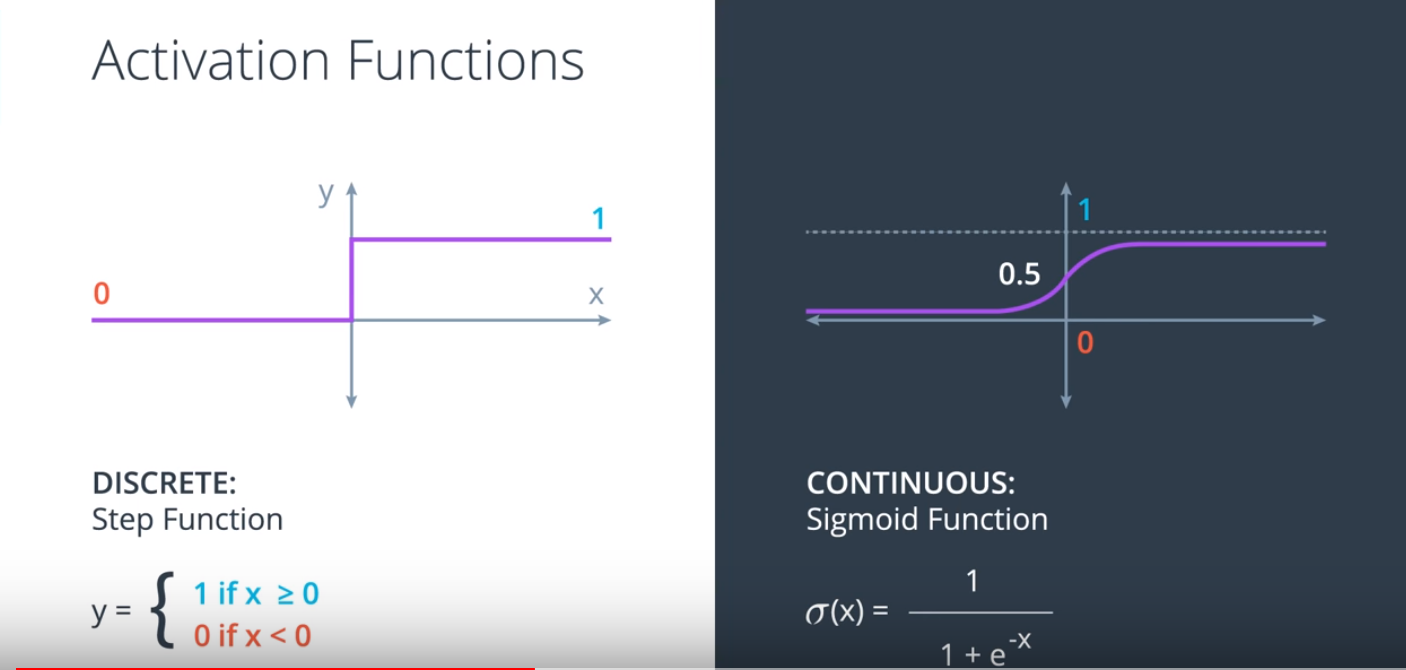

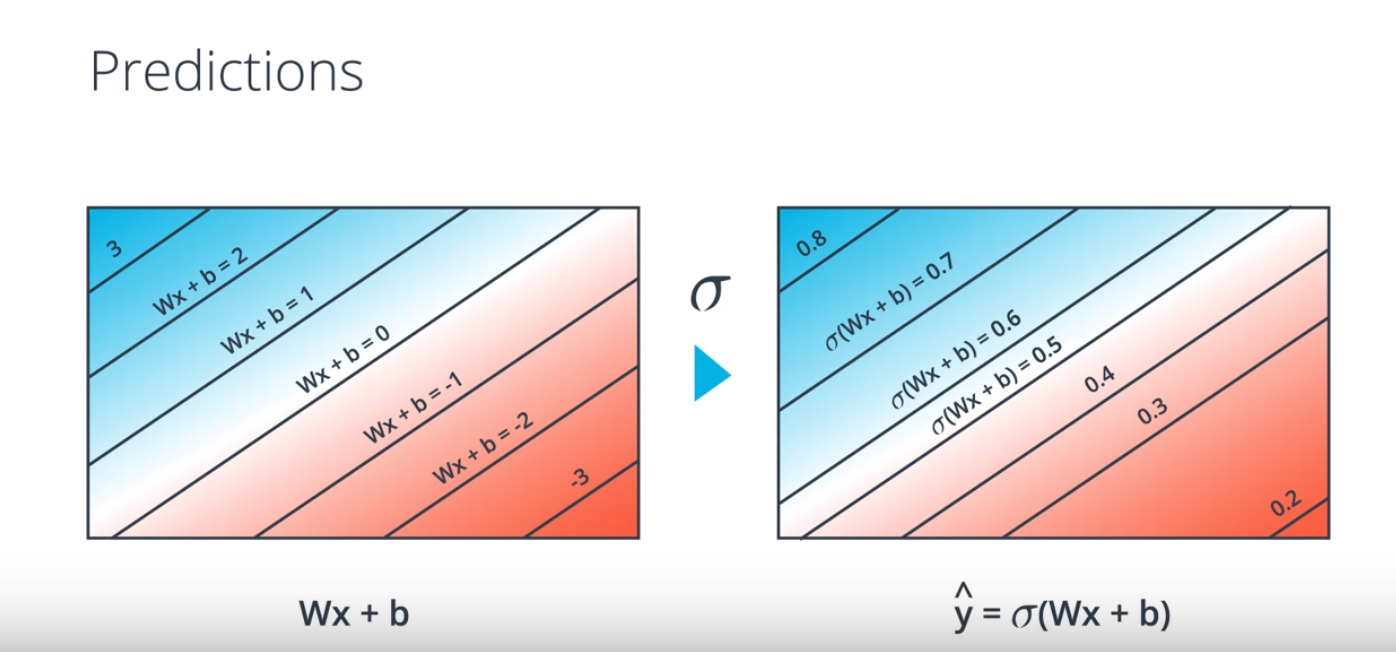

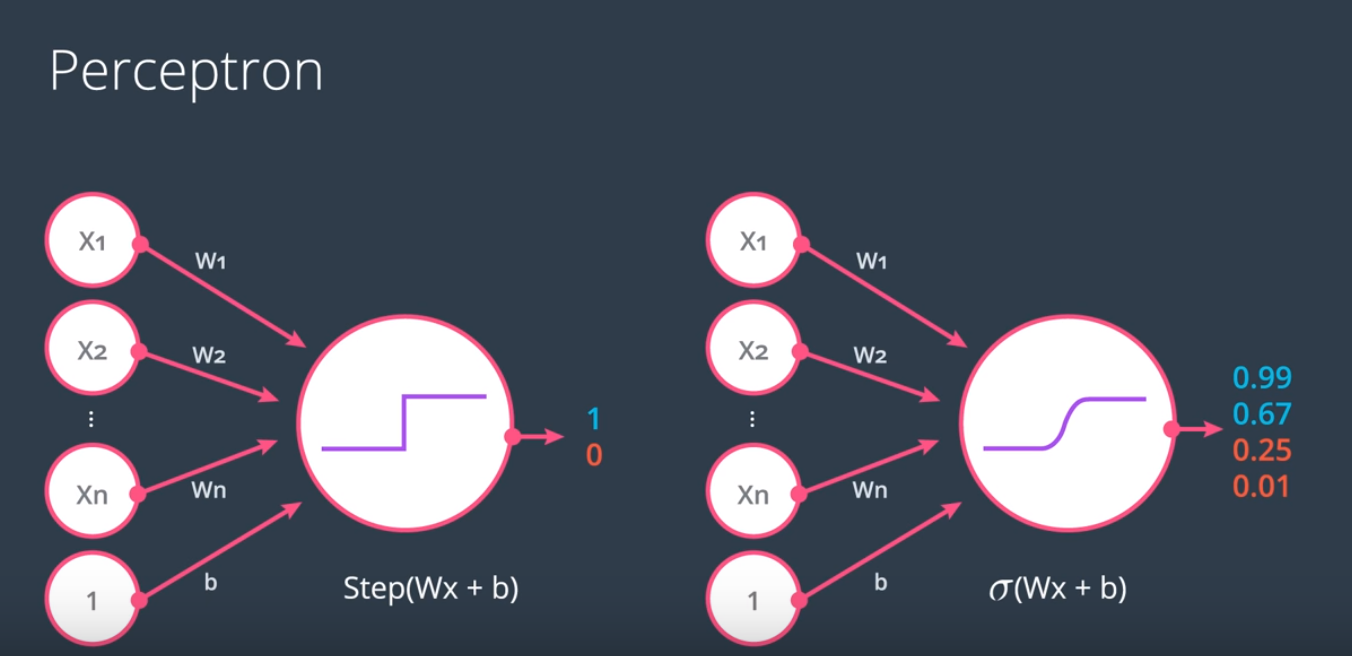

## Softmax

Write a function that can compute the softmax for a list of numbers.

Softmax is defined as P(i) {probability of class i} = e^zi/(e^z1 + ... e^zn)

Softmax can be used to define probability over more than just 2 classes. The input is the scores and the output is the probabilities.

In [8]:
# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    # return array of all values exp
    es = np.exp(L)
    # divide all exp values by sum of exp values
    results = es / np.sum(es)
    
    return results


In [9]:
test_L = [0, 1, 2]

softmax(test_L)

array([ 0.09003057,  0.24472847,  0.66524096])

## Probability & Cross Entropy

log(ab) = log(a) + log(b)

Sum of negatives of logarithms of probabilities is called cross entropy

`-ln(p1)-ln(p2) = cross entropy = -ln(probability)`

Lower cross entropy means more accurate model.

You can take the negative log of each probability of a point to get the "error" of the point, where higher numbers indicate more error.

The idea is to minimize cross entropy. Cross entropy can be considered the error function.

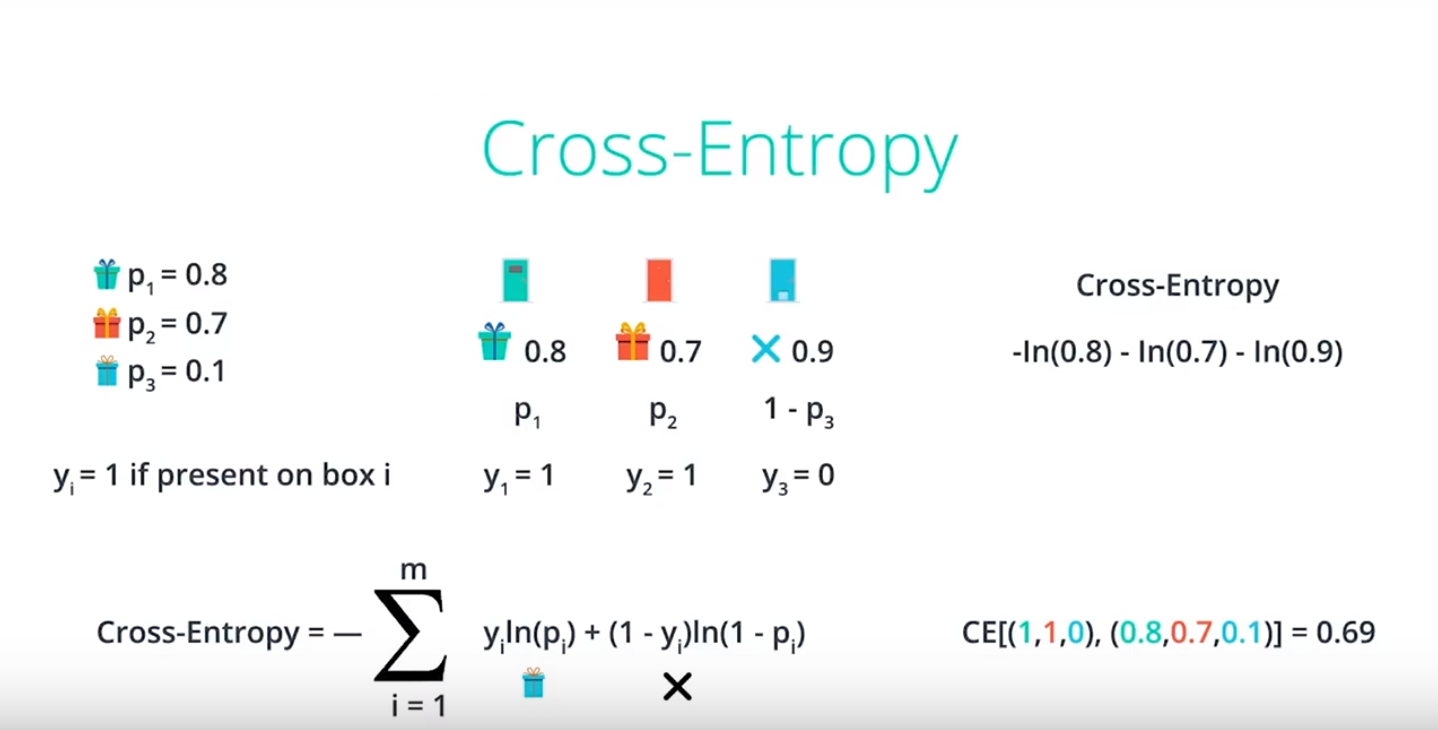

In [10]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    lins = []

    # Loop through all probs and assign the inputs
    # to array
    for i, prob in enumerate(P):
        y_i = Y[i]
        lins.append(prob if y_i == 1 else 1-prob)
    
    return -np.log(lins).sum()

In [11]:
# should be 0.69
cross_entropy([1,1,0], [0.8, 0.7, 0.1])

0.68517901091076849

In [12]:
# should be 5.12
cross_entropy([0, 0, 1], [0.8, 0.7, 0.1])

5.1159958097540823

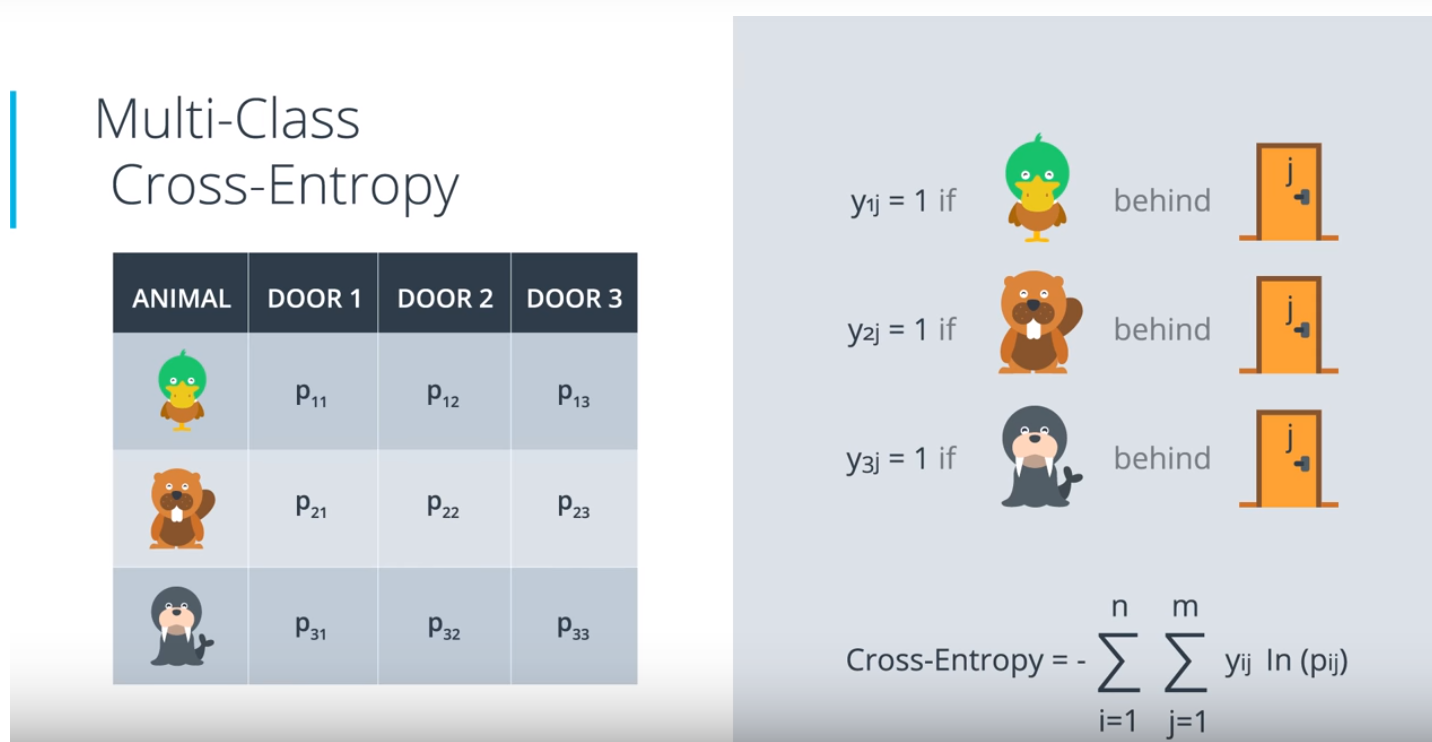

Where `m` is the number of classes.

## Error Function

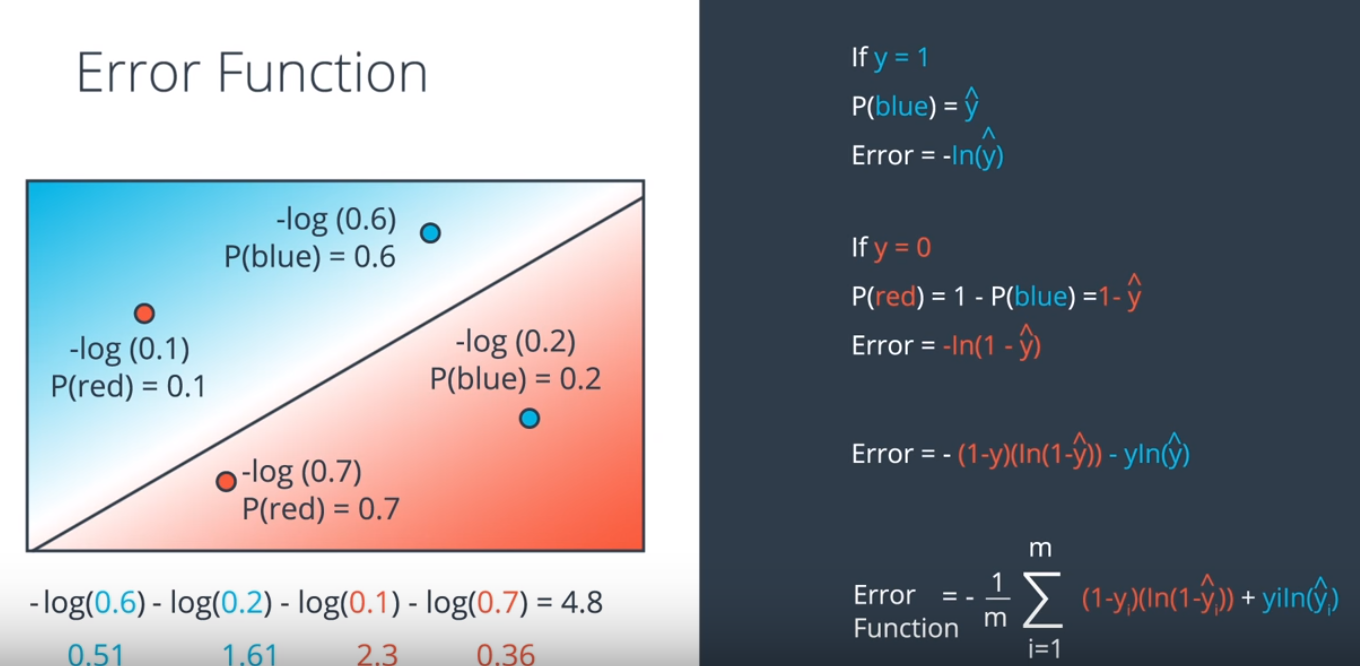

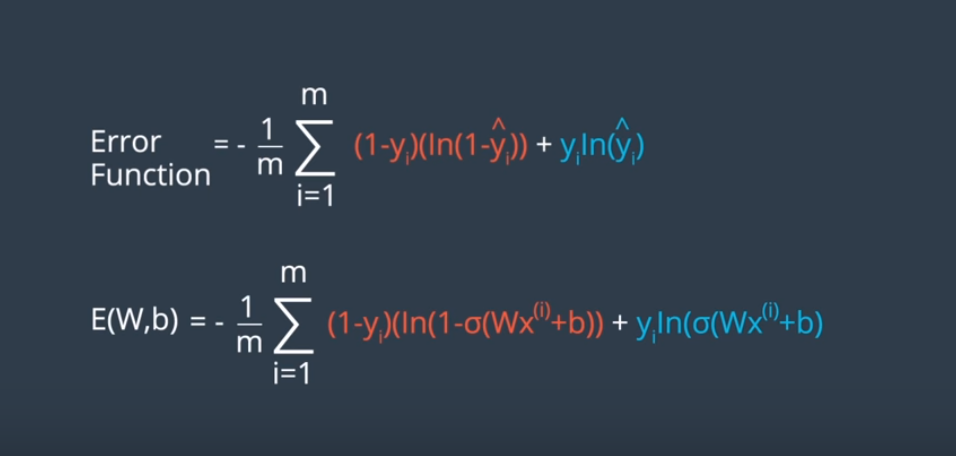

In [13]:
np.dot([1,2], [3,4])

11

In [14]:
np.sum(np.array([1,2]) * np.array([3,4]))

11

## Putting it together - Lab

```
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias
```

Sigmoid is activation function, turns outputs of `1`, `2`, etc to `.7`, `.04`, etc. The output for linear stuff is just computed by `wx+b`. The error function then calculates the error for the points by taking the prediction and a known value using the error formula. Finally, you can update the weights and bias using the gradient descent algorithm which is shown in `update_weights`.

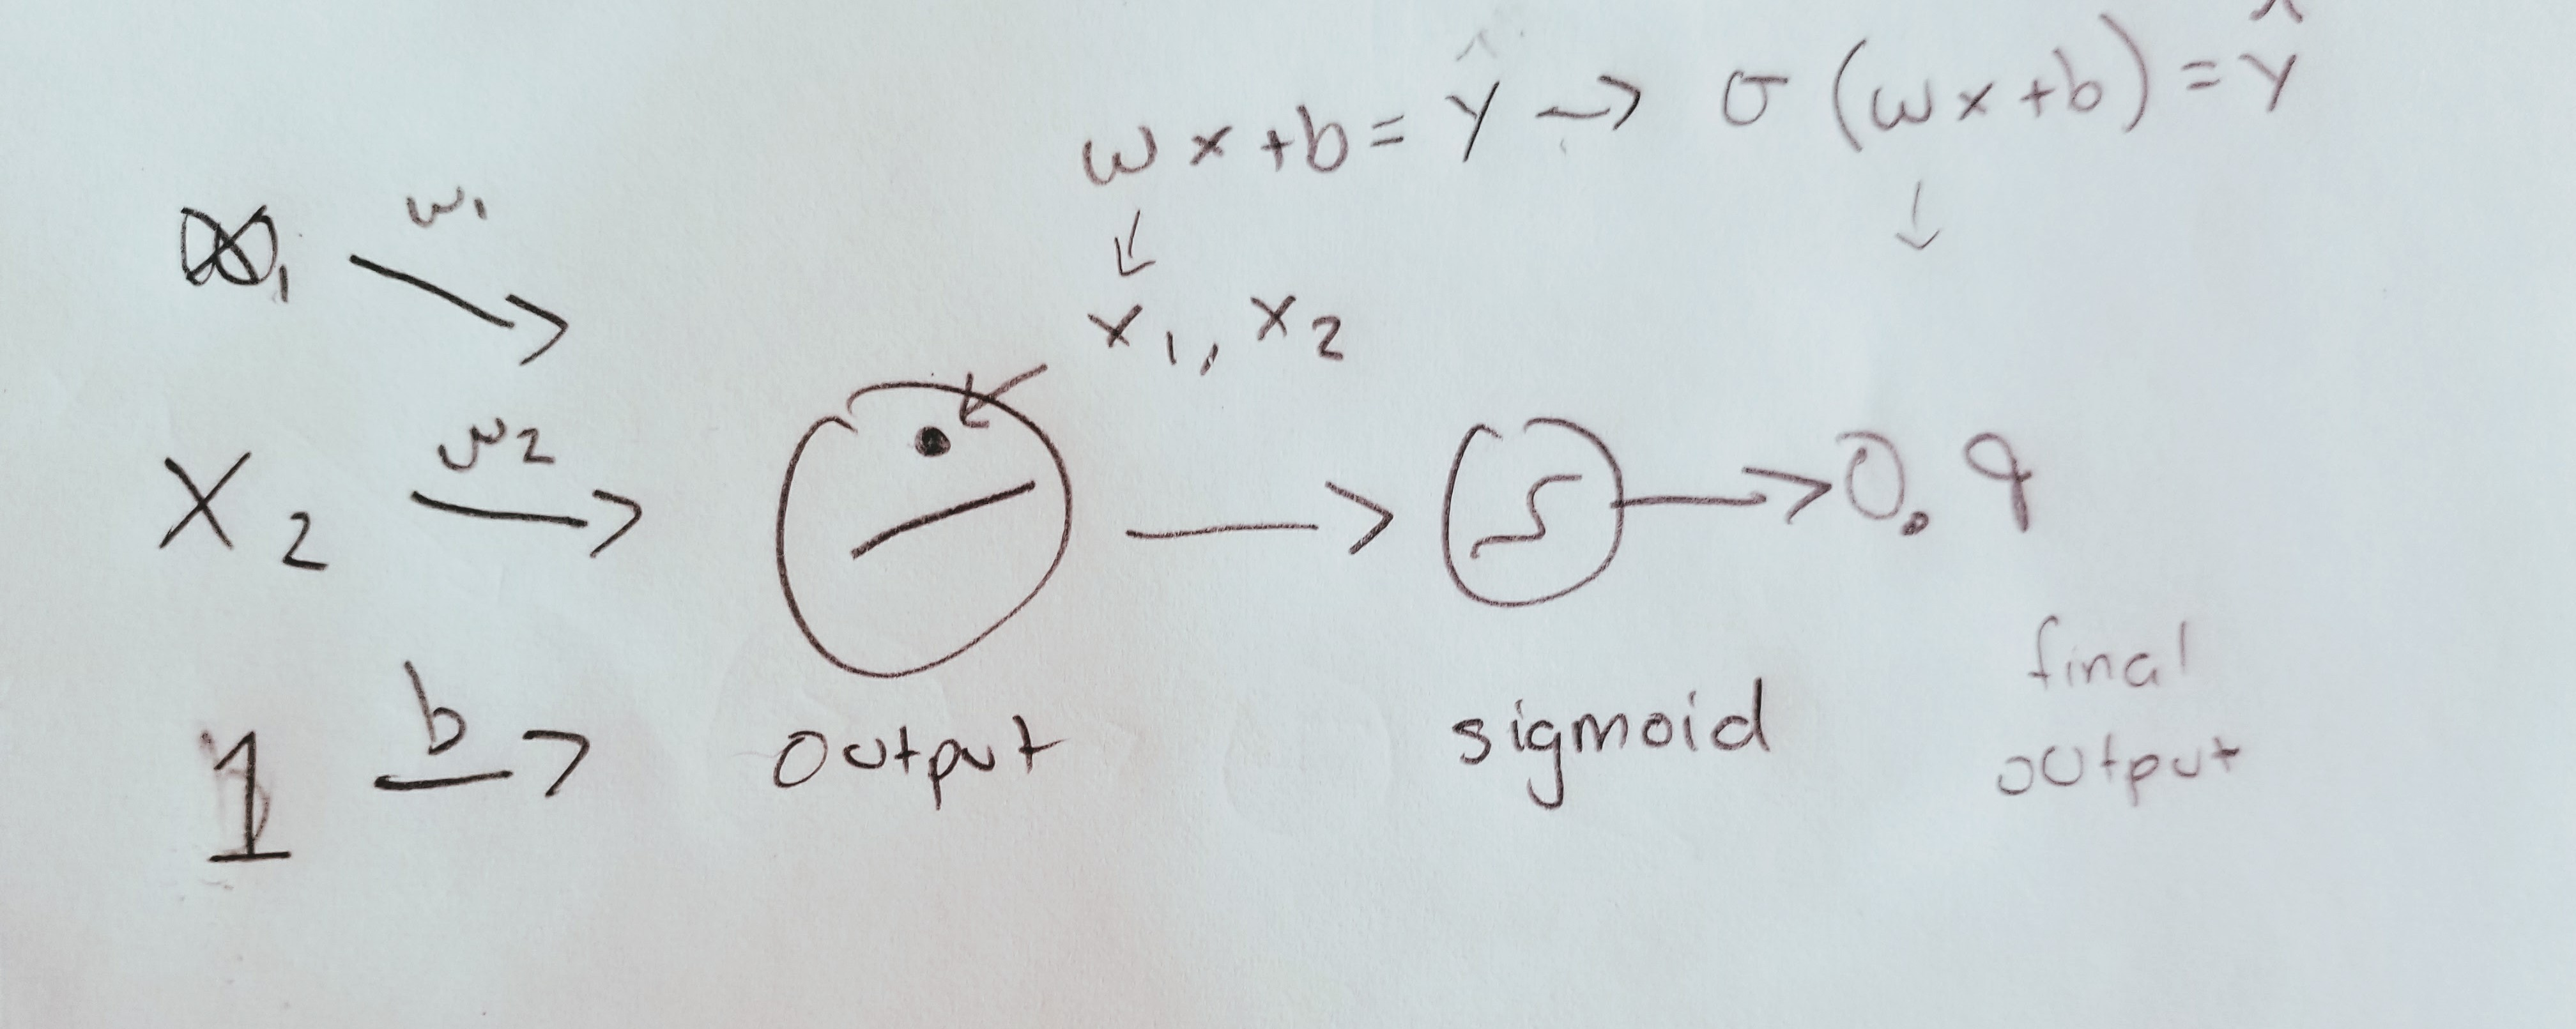

## Neural Network Arch & Non Linear Models

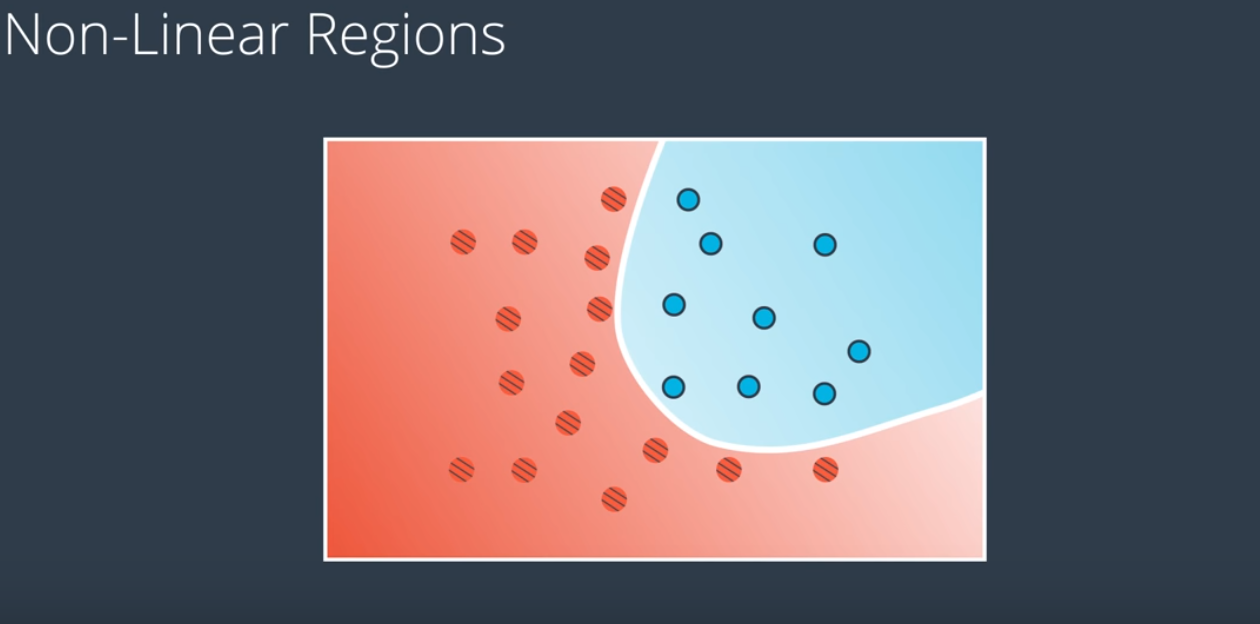

The seperating line is built by the points that are equally likely to be blue or red.

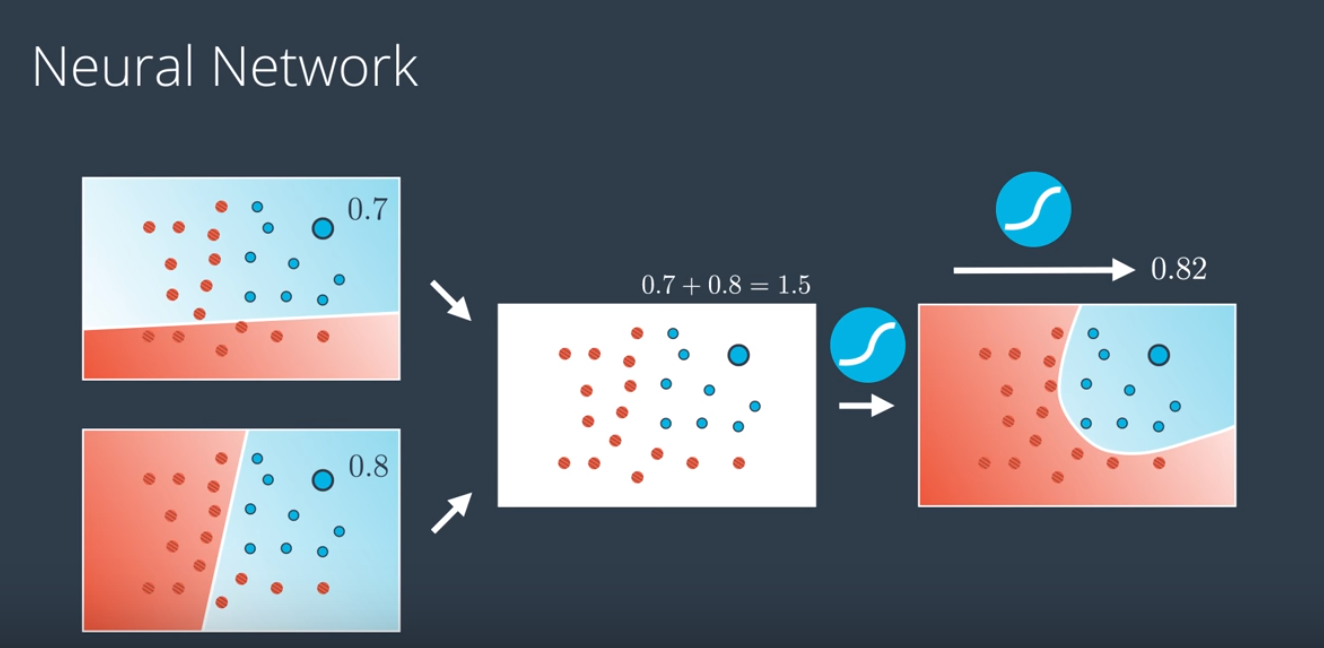

So you can view it as having to linear functions which each classify some blue point as a probability. In order to get the total probability for that point, you can add the seperate linear probabilities together and then use sigmoid to turn it back into a probability.

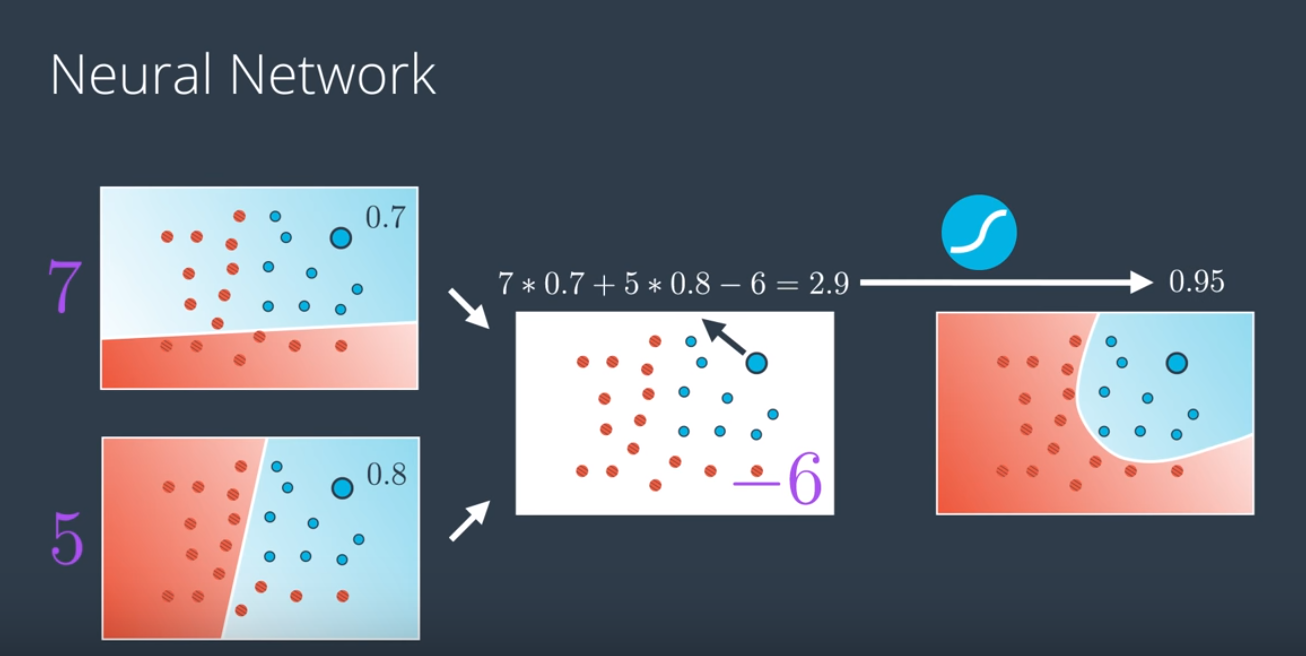

Now, consider weighting the input linear function probabilities and even adding a bias, letting you give one function more weight than another in the final result.You can even picture the resulting model as the "line between the two linear models". This is process is the building block of neural networks.

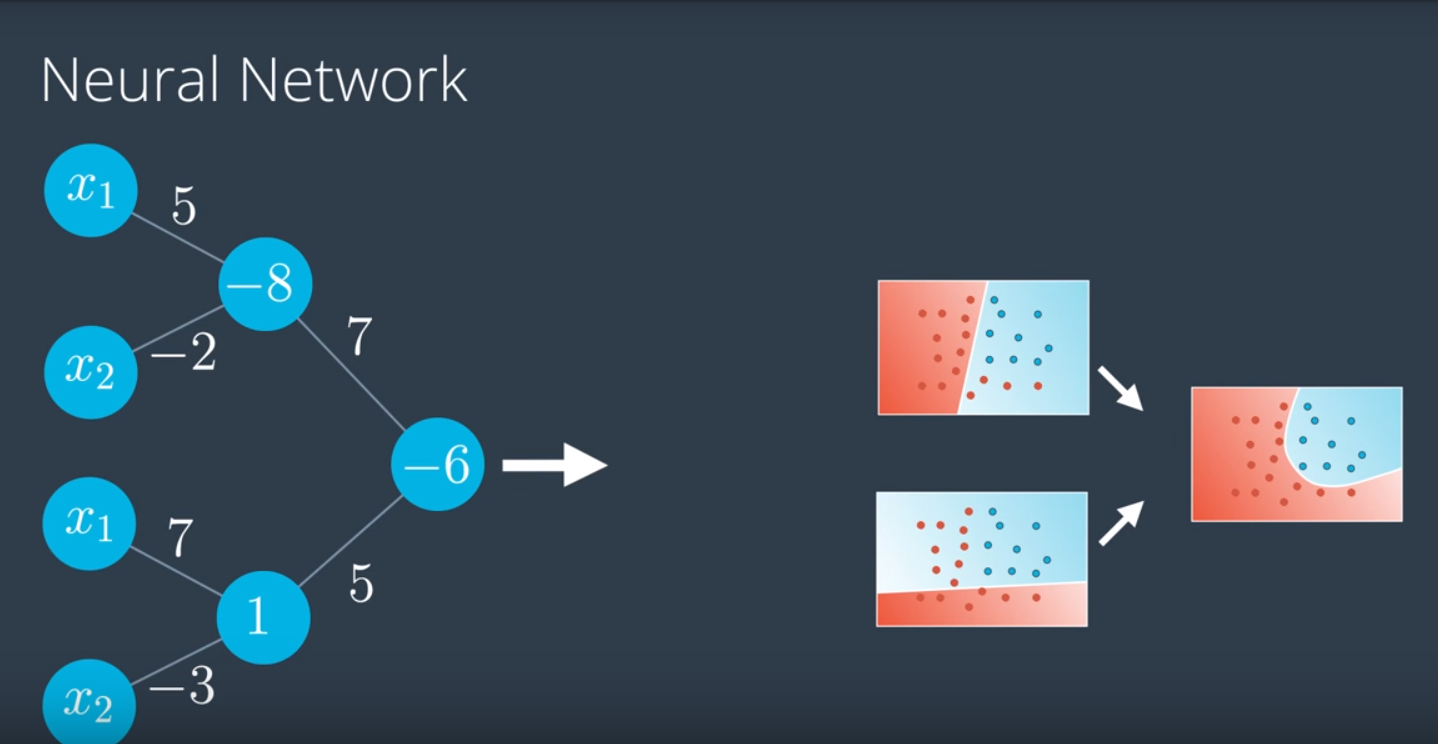

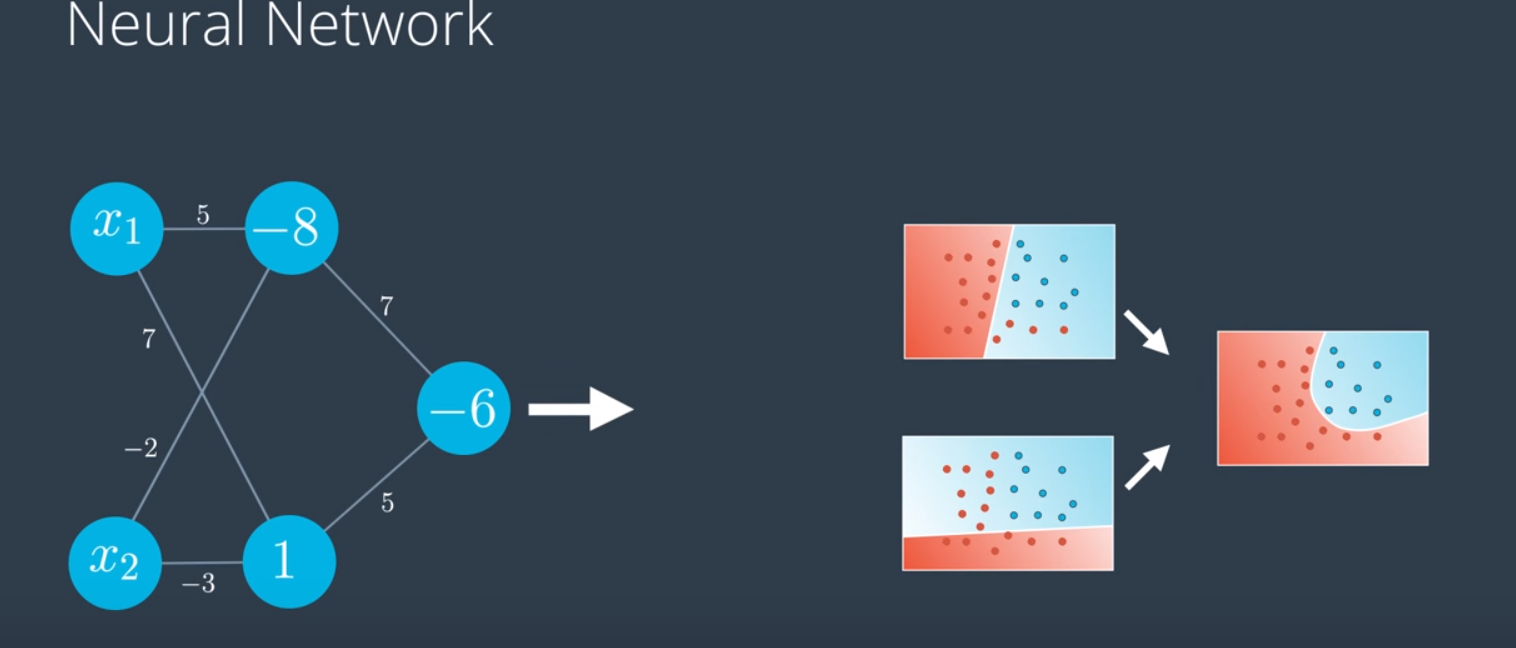

The same neural network using the form of representing the bias seperately:

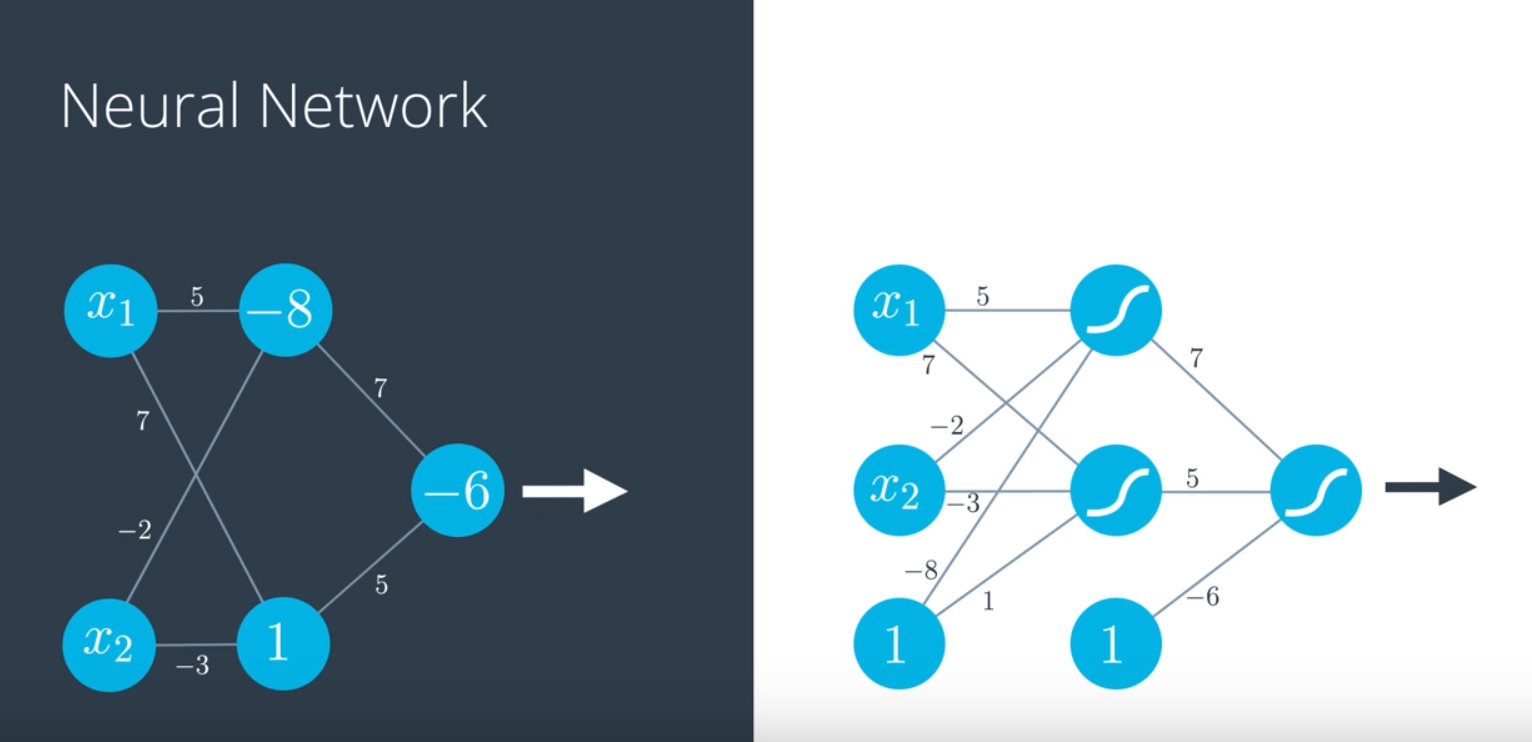

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [23]:
def nna_scratch_1(w1, w2, b):
    return sigmoid(w1 * .4 + w2 * .6 + b)

In [24]:
nna_scratch_1(2, 6, -2)

0.91682730350607766

In [25]:
nna_scratch_1(3,5, -2.2)

0.88079707797788231

You can get a neural network to do multi-class classification by expanding the number of output nodes to represent the probability of each class.

## Feedforward

Training neural networks, which really means what params do we have on edges to model data well.

Feed forward is the process that neural networks use to turn input into output.

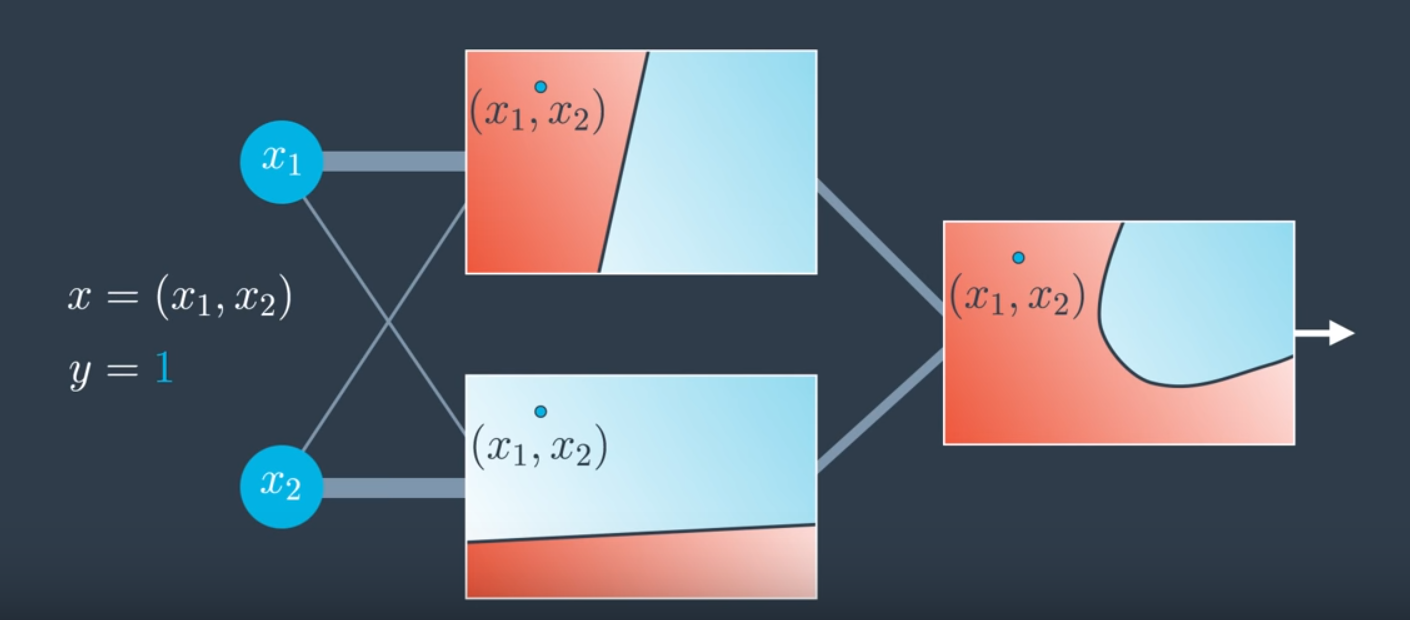

The feedforward process.

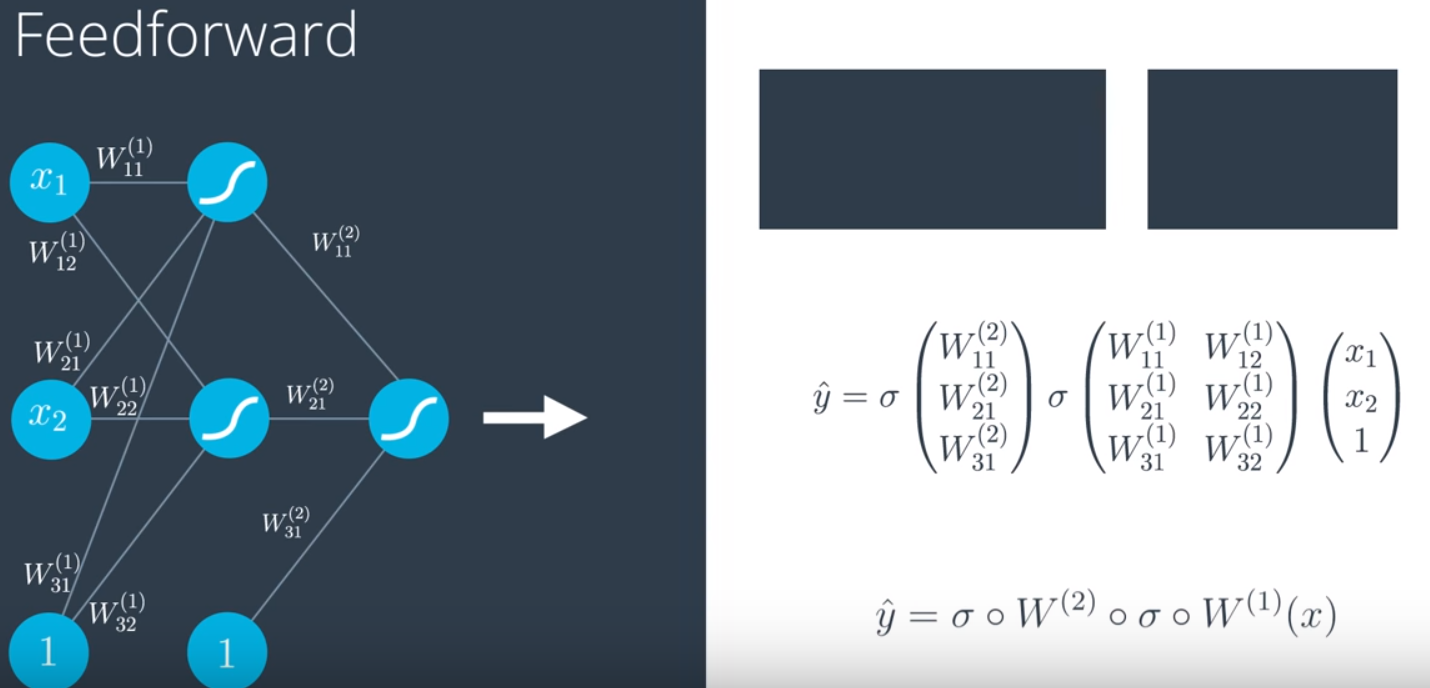

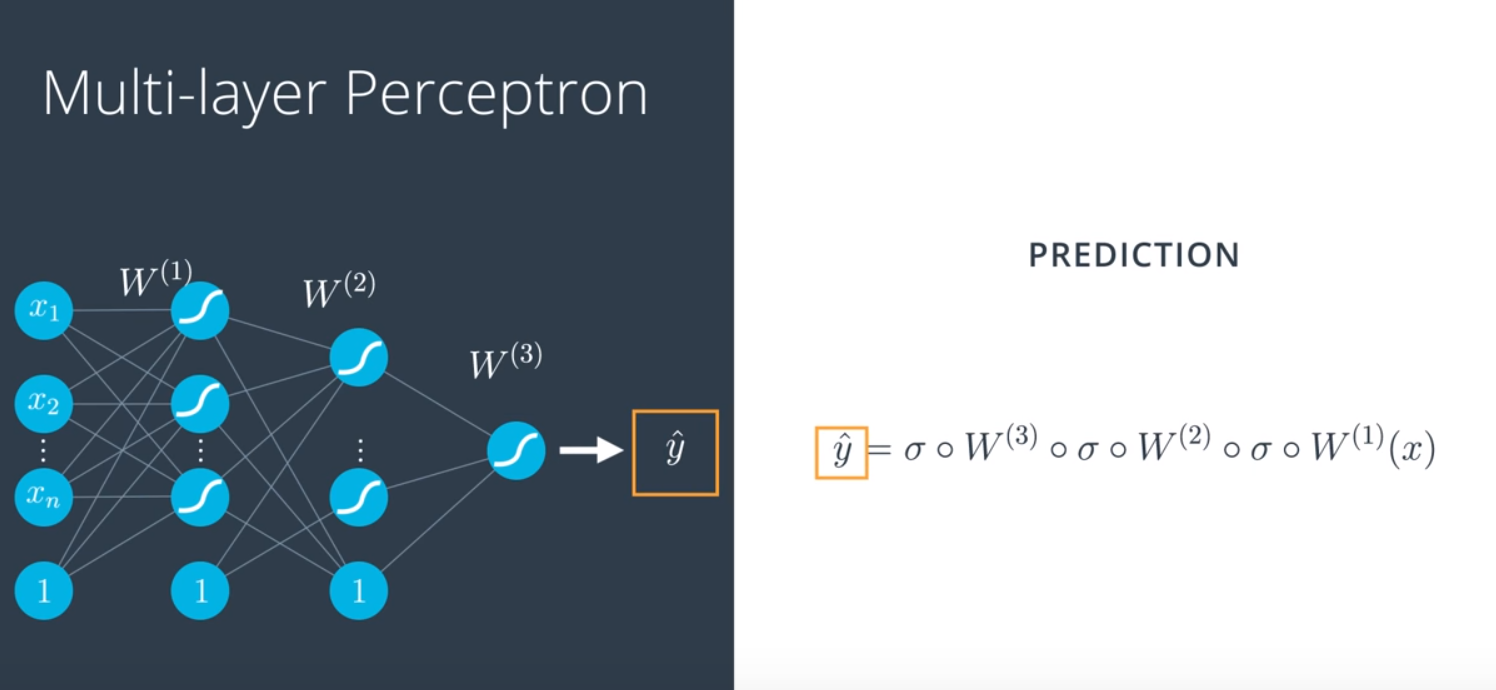

The error function works the exact same way, except now y^hat is just looking at a more complicated boundary.

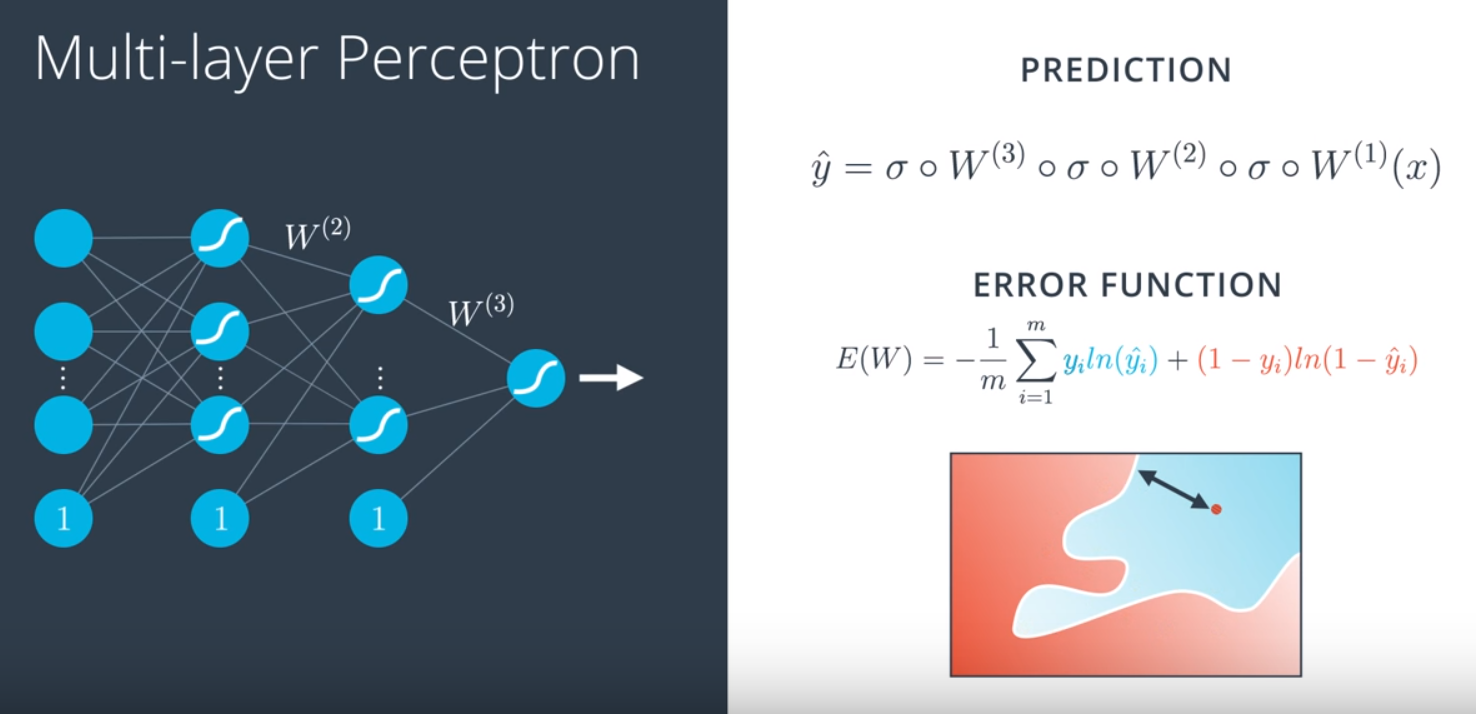

Another example of feed forward:

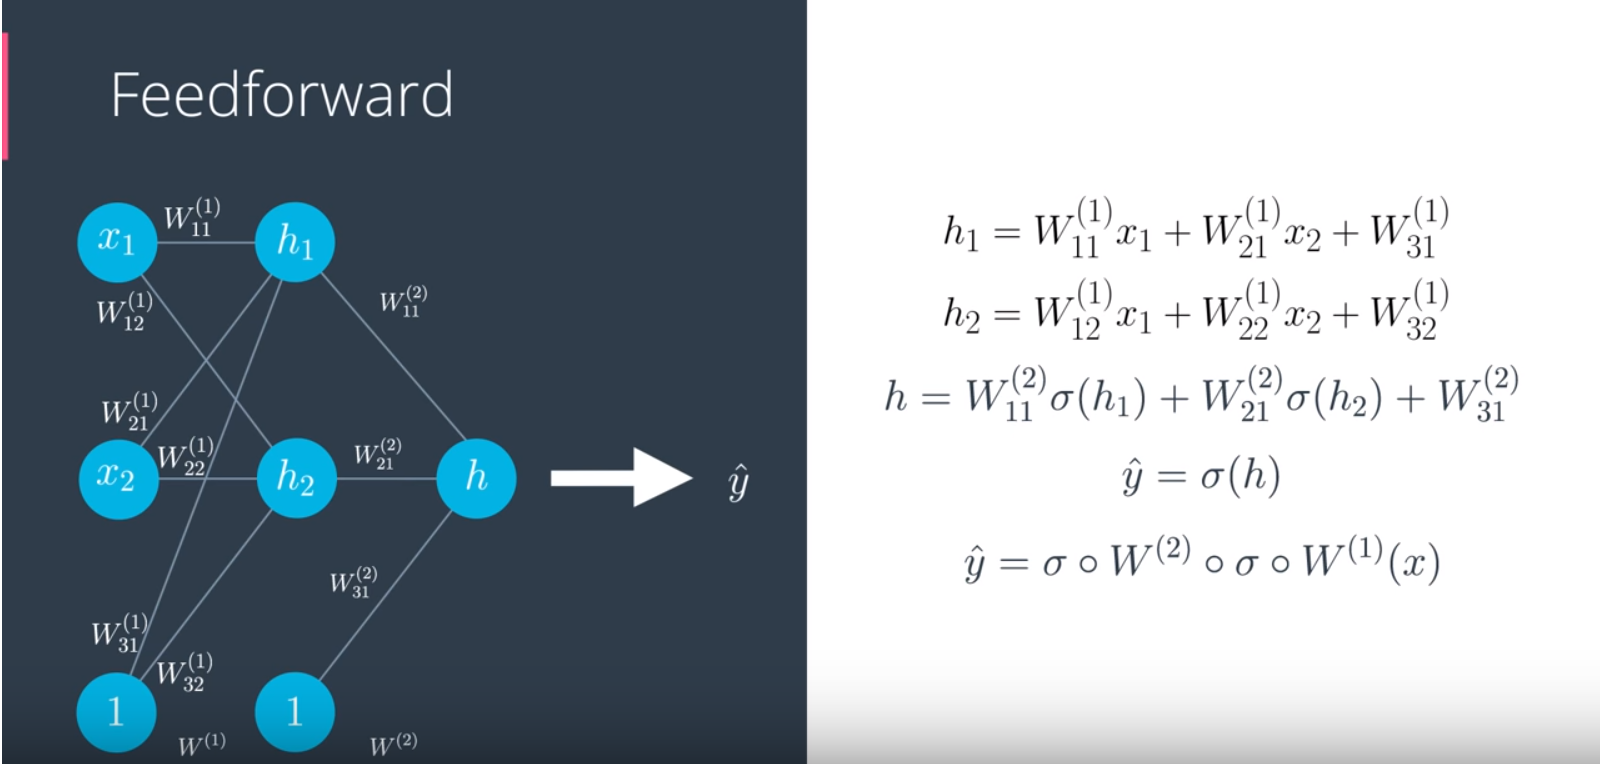

## Backpropagation

In a nutshell, backpropagation will consist of:

- Doing a feedforward operation.
- Comparing the output of the model with the desired output.
- Calculating the error.
- Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights.
- Use this to update the weights, and get a better model.
- Continue this until we have a model that is good.

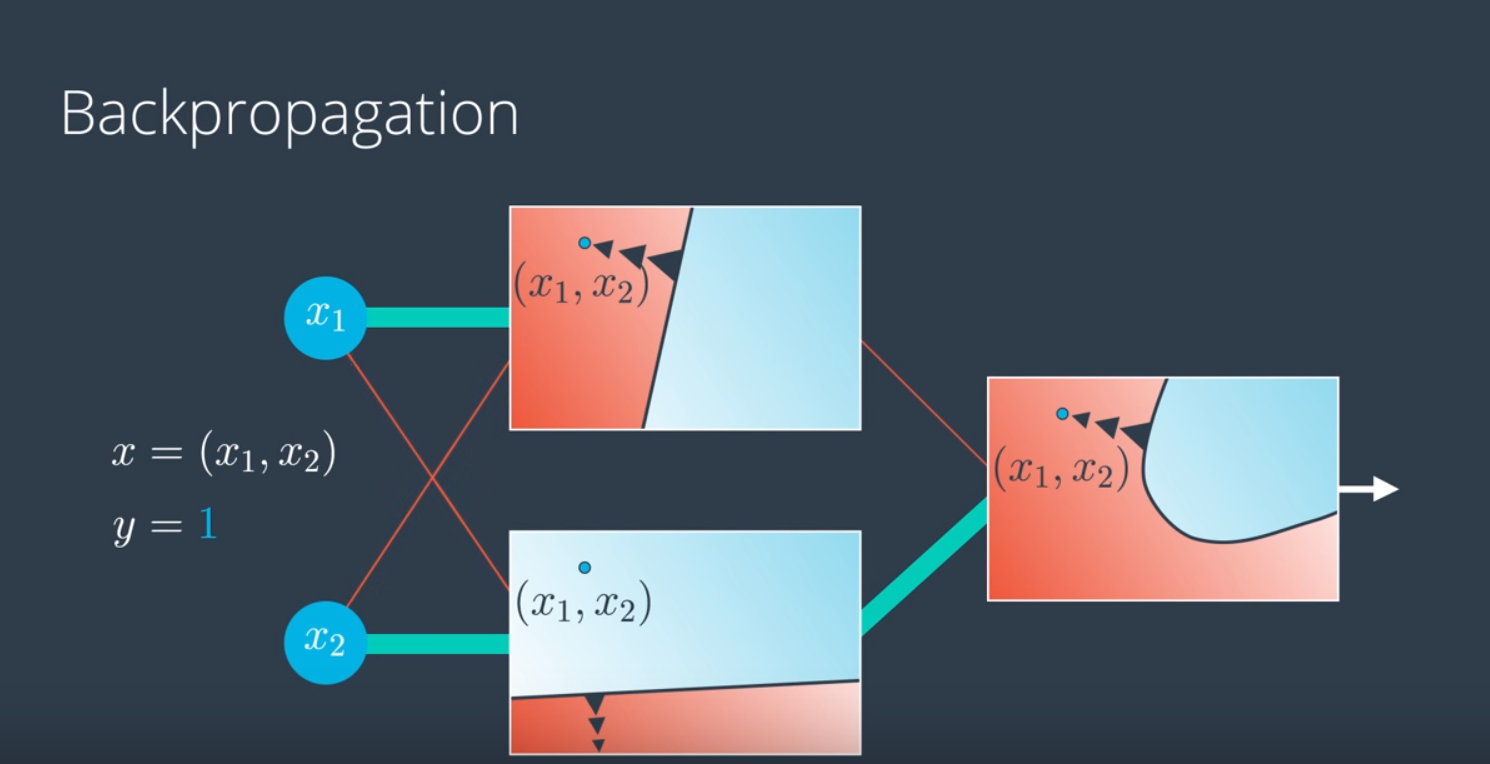

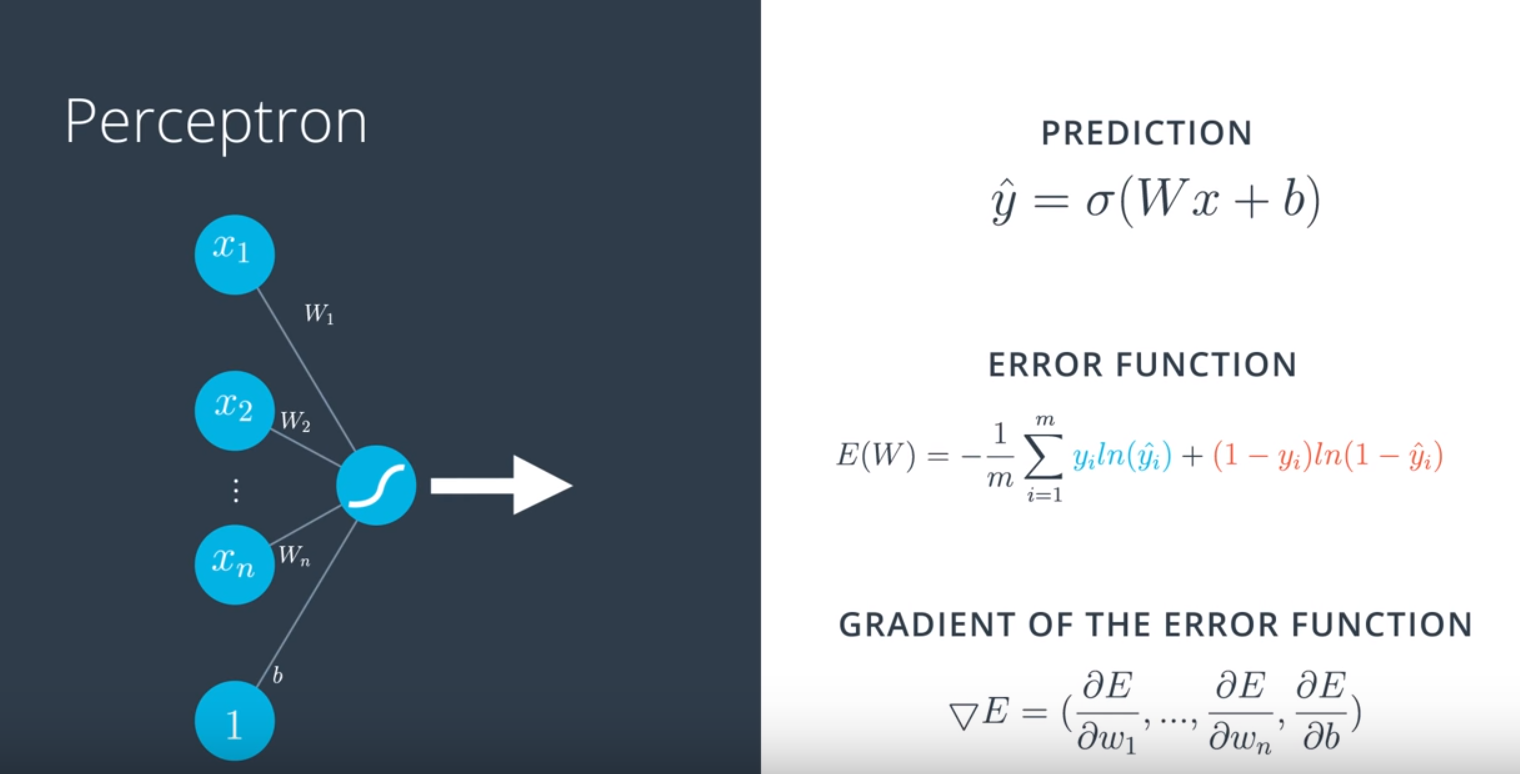

So below, notice how you can calculate the deravitive of the error with respect to the first weight (W11) by using the chain rule (you can find the deravitive by combining all the partial deravitives of the composed functions), so you really just start at the derivative of the error with respect to y^hat and then work your way backwards:

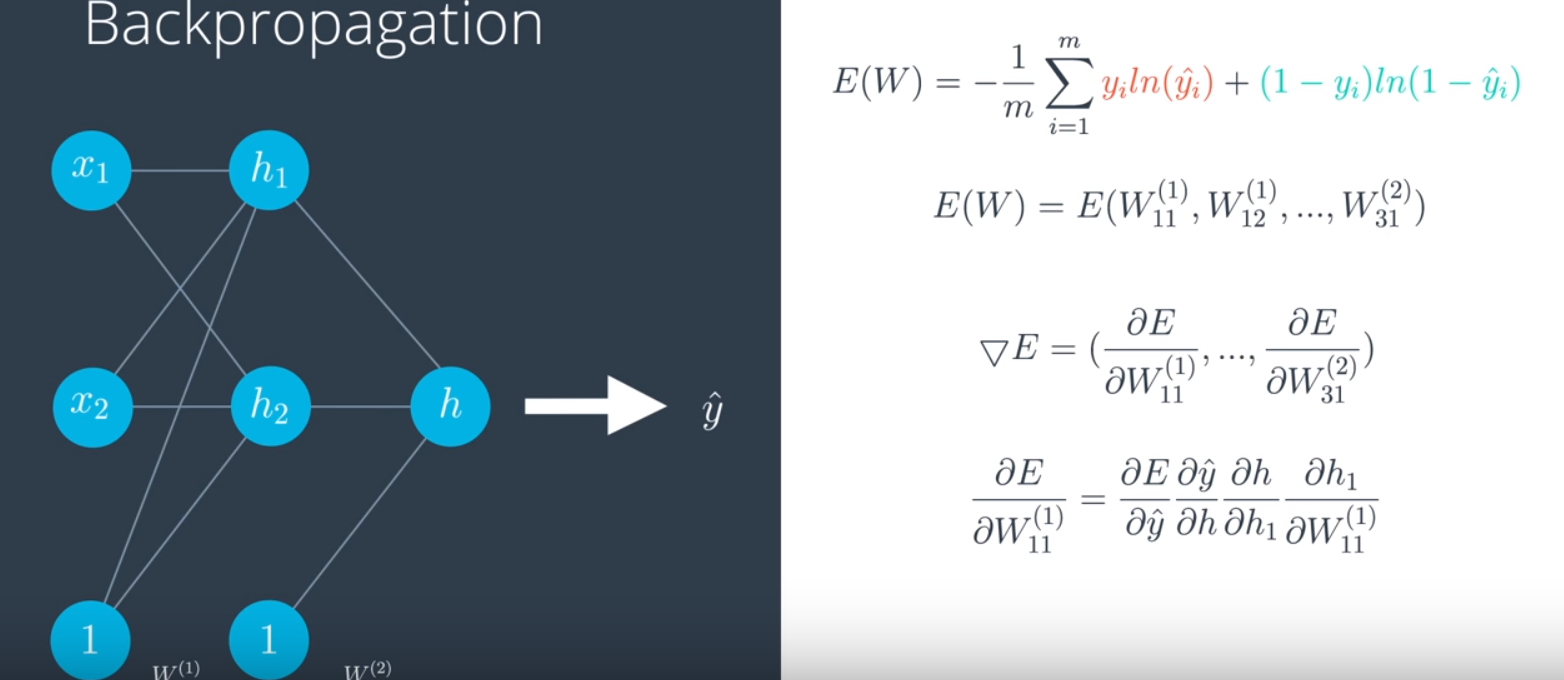

